<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *3*: *Linear Models: Linear Regression, Ridge Regression, Lasso Regression, Logistic & Softmax Regression***

###**Tenggat Waktu: 11 Mei 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas3_18062057731_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **11 Mei 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [2]:
# Isi dengan data diri Anda
NAMA = "Muhammad Faisal Adi Soesatyo"
KELAS = "B"
NPM = "1906293184"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
             "https://pandas.pydata.org/docs/reference/api/pandas.concat.html",
             "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html",
             "https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/",
             "https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation/blob/master/Linear_Regression.ipynb",
             "https://stackabuse.com/linear-regression-in-python-with-scikit-learn/",
             "https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html",
             "https://www.w3schools.com/python/python_ml_train_test.asp",
             "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html",
             "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html",
             "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html",
             "https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn",
             "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge",
             "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso",
             "https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a",
             "https://medium.com/@lily_su/confusion-matrix-roc-auc-and-imbalanced-classes-in-logistic-regression-5c7ead3deefc",
             "https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/",
             ""
]

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Faisal Adi Soesatyo dari kelas B dengan NPM 1906293184, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Faisal Adi Soesatyo)


In [4]:
# import library data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
from scipy import stats

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
import plotly.express as px

#Soal Tugas 3

Data merupakan modifikasi dari dataset di sinii: https://www.kaggle.com/datasets/enashed/diamond-prices

## Penjelasan Dataset

Data adalah ciri-ciri suatu berlian dan juga harga jualnya.

Deskripsi attribut-attribut:


*   diamond_id: Index dari berlian
* shape: Bentuk dari berlian
* size: Ukuran dari berlian
* color: Warna dari berlian
* fancy_color_dominant_color: Warna khusus utama dari berlian (apabila ada)
* fancy_color_secondary_color: Warna khusus kedua dari berlian (apabila ada)
* fancy_color_overtone: Warna overtone dari berlian (apabila ada)
* fancy_color_intensity: Intensitas warna dari berlian (apabila ada)
* clarity: kerjernihan dari berlian
* cut: potongan berlian
* symmetry: penilaian simetri dari berlian
* polish: polesan dari berlian
* meas_length: ukuran panjang
* meas_width: ukuran lebar
* meas_depth: ukuran kedalaman
* girdle_min: ukuran keliling minimal dari berlian
* girdle_max: ukuran keliling maksimal dari berlian
* culet_size: ukuran kulet
* culet_condition: kondisi kulet
* lab: Laboratori yang memberikan penilaian
* date
* TARGET_sales_price: harga jual dari berlian dalam USD
* TARGET_logistic: Label 0 untuk harga <= 1970 USD, Label 1 untuk harga > 1970 USD
* TARGET_softmax: Label 0 untuk harga <= 958, label 1 untuk 958 < harga <= 5207, label 2 untuk harga > 5207



In [5]:
df = pd.read_csv("diamonds_tugas_3.csv")

In [6]:
df.head()

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,lab,date,TARGET_sales_price,TARGET_logistic,TARGET_softmax
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,1.79,M,M,N,NaN,IGI,2022-02-24,200,0,1
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,1.78,STK,STK,N,NaN,IGI,2022-02-24,200,0,1
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,1.77,TN,M,NaN,NaN,IGI,2022-02-24,200,0,1
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,1.78,M,STK,NaN,NaN,IGI,2022-02-24,200,0,1
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,1.82,STK,STK,N,NaN,IGI,2022-02-24,200,0,1


# [25] Preprocessing

1. [10] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!




**Informasi terkait data**



In [7]:
# Berikan jawaban 1 di sini

# Total data and Total attributes (numeric and categoric)
total_rows, total_attributes = df.shape
print("Total data:", total_rows)
print("Total attributes:", total_attributes)
print()

# Info about attributes
display(df.info())
print()

# Statistics of each attributes
numericData = df.drop(columns = df.columns[0]).describe() #decide to drop the id
categoricData = df.describe(include = object)
display(numericData)
display(categoricData)

Total data: 219704
Total attributes: 24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  meas_length      

None

,size,meas_length,meas_width,meas_depth,TARGET_sales_price,TARGET_logistic,TARGET_softmax
count,219704.000000,219704.000000,219704.000000,219704.000000,2.197040e+05,219704.000000,219704.000000
mean,0.755176,5.548867,5.135623,3.285698,6.908035e+03,0.499927,1.110685
std,0.845892,1.763932,1.374527,2.054817,2.595944e+04,0.500001,0.614049
min,0.080000,0.000000,0.000000,0.000000,2.000000e+02,0.000000,0.000000
25%,0.310000,4.350000,4.310000,2.680000,9.580000e+02,0.000000,1.000000
50%,0.500000,5.060000,4.800000,3.030000,1.970000e+03,0.000000,1.000000
75%,1.000000,6.350000,5.700000,3.630000,5.207000e+03,1.000000,1.000000
max,19.350000,93.660000,62.300000,76.300000,1.449881e+06,1.000000,2.000000


,shape,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,culet_condition,lab,date
count,219704,210542,9164,1062,2038,9162,219704,159097,219704,219704,136271,135408,133963,15319,219704,219704
unique,11,10,12,10,8,9,11,6,5,5,9,9,8,3,3,1
top,Round,E,Yellow,Brown,None,Fancy,SI1,Excellent,Excellent,Excellent,M,STK,N,Pointed,GIA,2022-02-24
freq,158316,33103,6487,306,1650,3447,38628,124861,131619,175806,74421,70440,131899,15293,200434,219704


**Informasi terkait missing values and duplication**

In [8]:
# Missing values
print("##### MISSING VALUES #####")
display(df.isnull().sum())
print("--------------------------")

categorical_data = ['shape', 'color', 'fancy_color_dominant_color', 'fancy_color_secondary_color',
                    'fancy_color_overtone', 'fancy_color_intensity', 'clarity', 'cut', 'symmetry', 
                    'polish', 'girdle_min', 'girdle_max', 'culet_size', 'culet_condition', 'lab']

# method to detect data duplication
def detect_duplication(column):
  return df[column].duplicated().sum()

# method to detect unique value
def detect_unique_value(column):
  return pd.unique(df[column])

for item in categorical_data:
  print("##### " + item + " #####")
  print("number of duplication:", detect_duplication(item))
  display(detect_unique_value(item))
  print("------------------------")

##### MISSING VALUES #####


diamond_id                          0
shape                               0
size                                0
color                            9162
fancy_color_dominant_color     210540
fancy_color_secondary_color    218642
fancy_color_overtone           217666
fancy_color_intensity          210542
clarity                             0
cut                             60607
symmetry                            0
polish                              0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                      83433
girdle_max                      84296
culet_size                      85741
culet_condition                204385
lab                                 0
date                                0
TARGET_sales_price                  0
TARGET_logistic                     0
TARGET_softmax                      0
dtype: int64

--------------------------
##### shape #####
number of duplication: 219693


array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

------------------------
##### color #####
number of duplication: 219693


array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', nan],
      dtype=object)

------------------------
##### fancy_color_dominant_color #####
number of duplication: 219691


array([nan, 'Orange', 'Brown', 'Yellow', 'Pink', 'Black', 'Other', 'Gray',
       'Purple', 'Blue', 'Green', 'Chameleon', 'Red'], dtype=object)

------------------------
##### fancy_color_secondary_color #####
number of duplication: 219693


array([nan, 'Purple', 'Green', 'Yellow', 'Brown', 'Orange', 'Pink',
       'Gray', 'Blue', 'Violet', 'Red'], dtype=object)

------------------------
##### fancy_color_overtone #####
number of duplication: 219695


array([nan, 'None', 'Yellowish', 'Brownish', 'Pinkish', 'Greenish',
       'Orangey', 'Purplish', 'Grayish'], dtype=object)

------------------------
##### fancy_color_intensity #####
number of duplication: 219694


array([nan, 'Fancy', 'Very Light', 'Faint', 'Fancy Light', 'Light',
       'Fancy Deep', 'Fancy Intense', 'Fancy Dark', 'Fancy Vivid'],
      dtype=object)

------------------------
##### clarity #####
number of duplication: 219693


array(['VVS2', 'VVS1', 'I1', 'VS1', 'VS2', 'IF', 'SI2', 'I2', 'SI1',
       'SI3', 'I3'], dtype=object)

------------------------
##### cut #####
number of duplication: 219697


array(['Excellent', 'Very Good', nan, 'Good', 'Fair', 'None', 'Ideal'],
      dtype=object)

------------------------
##### symmetry #####
number of duplication: 219699


array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

------------------------
##### polish #####
number of duplication: 219699


array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

------------------------
##### girdle_min #####
number of duplication: 219694


array(['M', 'STK', 'TN', 'TK', nan, 'VTN', 'VTK', 'XTK', 'XTN', 'STN'],
      dtype=object)

------------------------
##### girdle_max #####
number of duplication: 219694


array(['M', 'STK', 'TK', nan, 'TN', 'VTK', 'XTK', 'XTN', 'VTN', 'STN'],
      dtype=object)

------------------------
##### culet_size #####
number of duplication: 219695


array(['N', nan, 'S', 'M', 'VS', 'L', 'EL', 'SL', 'VL'], dtype=object)

------------------------
##### culet_condition #####
number of duplication: 219700


array([nan, 'Abraded', 'Chipped', 'Pointed'], dtype=object)

------------------------
##### lab #####
number of duplication: 219701


array(['IGI', 'GIA', 'HRD'], dtype=object)

------------------------


**Informasi terkait outlier**

In [9]:
# method to count number of outliers
numerical_data = ["size", "meas_length", "meas_width", "meas_depth"]

supl = []
def count_outliers(column):
  attr = df[column]
  q1, q3= np.percentile(attr, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr)
  supl.append(lower_bound)
  supl.append(upper_bound)
  number_of_outliers = ((attr < lower_bound) | (attr > upper_bound)).sum()
  return number_of_outliers

for item in numerical_data:
  display(count_outliers(item))

9447

9882

11456

9115

2. [5] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil regresi yang maksimal.

**Handle missing values**

In [10]:
# Berikan jawaban 2 di sini
# Handle missing value of color, cut, girdle_min, girdle_max, culet_size
tolerable_missing_value = ['color', 'cut', 'girdle_min', 'girdle_max', 'culet_size']
for item in tolerable_missing_value:
  most_frequent_item = df[item].mode()[0]
  df[item].fillna(most_frequent_item, inplace = True)

display(df.isnull().sum())
df.dropna(axis = 1, inplace = True)
df.shape

diamond_id                          0
shape                               0
size                                0
color                               0
fancy_color_dominant_color     210540
fancy_color_secondary_color    218642
fancy_color_overtone           217666
fancy_color_intensity          210542
clarity                             0
cut                                 0
symmetry                            0
polish                              0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
culet_size                          0
culet_condition                204385
lab                                 0
date                                0
TARGET_sales_price                  0
TARGET_logistic                     0
TARGET_softmax                      0
dtype: int64

(219704, 19)

**Handle outlier**

In [11]:
supl = []
numerical_data = ["size", "meas_length", "meas_width", "meas_depth"]
def count_outliers(column):
  attr = df[column]
  q1, q3= np.percentile(attr, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr)
  supl.append(lower_bound)
  supl.append(upper_bound)
  result = df.loc[(attr > lower_bound) & (attr < upper_bound)]
  return result

for item in numerical_data:
  df = count_outliers(item)

df.shape

(194061, 19)

3. [10] Menurut Anda, apabila dilakukan linear regression, logistic regression, dan softmax regression apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

> Ya perlu, normalisasi perlu dilakukan untuk memastikan bahwa semua value yang terdapat dalam data dapat diproses secara numerik. Terlebih attribute dengan tipe object, mengingat object tidak dapat diproses secara numerik. Sedangkan apabila kita berbicara terkait regression, operasi secara numerik dan matematis sangat diperlukan.\
> Normalisasi: One-Hot Encoding, karena one-hot encoding dapat menangani tipe data object yang cenderung sulit dan rawan misinterpret pada data label-encoding. Selain itu one-hot encoding jauh lebih fair dalam memberikan bobot pada tiap valuenya, sehingga tidak perlu ditangani secara manual. Kelemahannya hanya akan menambah jumlah kolom pada data

In [12]:
df_one_hot_encoded = pd.get_dummies(
    df.drop(['date', 'TARGET_sales_price', 'TARGET_logistic', 'TARGET_softmax'], axis = 1))
display(df_one_hot_encoded)

,diamond_id,size,meas_length,meas_width,meas_depth,shape_Asscher,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,culet_size_L,culet_size_M,culet_size_N,culet_size_S,culet_size_SL,culet_size_VL,culet_size_VS,lab_GIA,lab_HRD,lab_IGI
0,131328926,0.09,2.85,2.87,1.79,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,131704776,0.09,2.84,2.89,1.78,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,131584417,0.09,2.88,2.90,1.77,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,131584416,0.09,2.86,2.88,1.78,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,131613644,0.09,2.79,2.83,1.82,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219487,92764399,1.50,6.49,6.05,4.26,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
219491,135118963,0.52,4.78,4.23,2.76,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
219525,114767888,0.76,5.28,4.58,3.38,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
219685,116540612,0.89,6.44,4.96,3.16,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# [45] Regresi 
(Penggunaan library diperbolehkan). Gunakan TARGET_sales_price sebagai kolom target.
1. [15] Implementasikan Linear Regression pada data hasil preprocessing. Gunakan Method dari library sklearn.
>- Tampilkan visualisasi hasil prediksi
>- Tampilkan nilai MSE, MAE, RMSE, dan R-Squared




**Preparation**

In [89]:
# Separate between target and predictor
## Jumlah data dapat diatur
x_predictor = df_one_hot_encoded
y_target = df.loc[:, ['TARGET_sales_price']]

# Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_x_predictor = scale.fit_transform(x_predictor)

# Project to 1D
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca_component = pca.fit_transform(scale_x_predictor)
df_pca_component = pd.DataFrame(data = pca_component, columns = [
  'Principal Component 1'])
predictor_concat_target = pd.concat([df_pca_component, y_target], axis = 1, join = 'outer')

# Split into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_pca_component, y_target, test_size = 0.2, random_state = 30)

**Linear regression**

In [14]:
# Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting
y_prediction = regressor.predict(x_test)
print(x_test.shape)
print(y_prediction.shape)

(38813, 1)
(38813, 1)


**Visualisasi hasil prediksi**

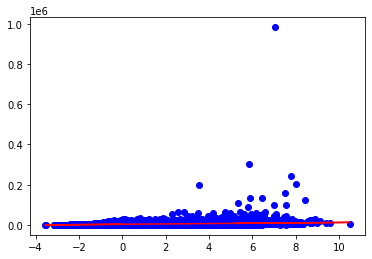

In [15]:
# Berikan jawaban 1 di sini
from matplotlib import pyplot as plt
plt.scatter(x_test, y_test, color = 'b')
plt.plot(x_test, y_prediction, color = 'red')
plt.show()

**Nilai MSE, MAE, RMSE, dan R-Squared**

In [16]:
# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_prediction)
display(MSE)

# MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
display(MAE)

# RMSE
RMSE = mean_squared_error(y_test, y_prediction, squared = False)
display(RMSE)

# R-Squared
from sklearn.metrics import r2_score
Rsqrt = r2_score(y_test, y_prediction)
display(Rsqrt)

43794073.20508154

2074.078231364865

6617.709060171922

0.08727317013903668

2. [10] Implementasikan Ridge Regression pada data hasil preprocessing. Gunakan method dari library sklearn.
>- Tampilkan nilai  R-Squared
>- Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi generalization error, dengan kata lain menghindari overfitting. Hal ini dilakukan dengan memberikan batasan/constraint atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

**Ridge regression**

In [17]:
# Training the model
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha = .01)
ridge_regression.fit(x_train, y_train)

# Predicting
y_prediction_ridge = ridge_regression.predict(x_test)
print(x_test.shape)
print(y_prediction_ridge.shape)

(38813, 1)
(38813, 1)


**Nilai R-Squared**

In [18]:
# R-Squared
from sklearn.metrics import r2_score
Rsqrt_ridge = r2_score(y_test, y_prediction_ridge)
display(Rsqrt_ridge)

0.08727317006681679

**Perubahan parameter alpha**

In [19]:
# Berikan jawaban 2 di sini
# Training the model
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha = 15)
ridge_regression.fit(x_train, y_train)

# Predicting
y_prediction_ridge = ridge_regression.predict(x_test)
print(x_test.shape)
print(y_prediction_ridge.shape)

# R-Squared
from sklearn.metrics import r2_score
Rsqrt_ridge = r2_score(y_test, y_prediction_ridge)
display(Rsqrt_ridge)

(38813, 1)
(38813, 1)


0.08727306178009087

**Analisis keterkaitan nilai alpha pada hasil regresi**

Berdasarkan percobaan yang sudah saya lakukan, terbukti bahwa nilai alpha berpengaruh pada kualitas hasil regresi. Dapat dilihat dari hasil nilai r-squared yang terbentuk. Nilai r-squared dengan alpha sebesar 15 terbukti lebih besar ketimbang r-squared dengan alpha sebesar .01. Namun perubahan ini tidaklah begitu signifikan, poin utamanya tetap pada kualitas model (untuk nilai r-squared).

Mengingat nilai alpha yang terlalu besar dapat mengakibatkan underfit juga terlalu kecil dapat mengakibatkan overfit.

3. [10] Implementasikan Lasso Regression pada data hasil preprocessing. Gunakan method dari library sklearn.
>- Tampilkan nilai R-Squared.
>- Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.

**Lasso regression**

In [20]:
# Training the model
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha = .01)
lasso_regression.fit(x_train, y_train)

# Predicting
y_prediction_lasso = lasso_regression.predict(x_test)
print(x_test.shape)
print(y_prediction_lasso.shape)

(38813, 1)
(38813,)


**Nilai R-Squared**

In [21]:
# R-Squared
from sklearn.metrics import r2_score
Rsqrt_lasso = r2_score(y_test, y_prediction_lasso)
display(Rsqrt_lasso)

0.08727315760766652

**Perubahan parameter alpha**

In [22]:
# Berikan jawaban 3 di sini
# Training the model
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha = 15)
lasso_regression.fit(x_train, y_train)

# Predicting
y_prediction_lasso = lasso_regression.predict(x_test)
print(x_test.shape)
print(y_prediction_lasso.shape)

# R-Squared
from sklearn.metrics import r2_score
Rsqrt_lasso = r2_score(y_test, y_prediction_lasso)
display(Rsqrt_lasso)

(38813, 1)
(38813,)


0.0872534324773161

**Analisis keterkaitan nilai alpha pada hasil regresi**

Benar terbukti bahwa dengan menaikkan nilai parameter alpha dapat meningkatkan kualitas hasil regresi. Hal ini ditandai dengan peningkatan pada r-squared pada alpha = 15 dibandingkan dengan r-squared pada alpha = .01. Meskipun perubahannya tidak begitu signifikan.

Seperti yang diketahui, semakin mendekati 1 maka r-squared dianggap correlated sedangkan semakin mendekati 0 maka dianggap less-corelated.

4. [10] Bandingkan hasil dari ketiga metode. Manakah hasil yang terbaik? Apakah ada hal menarik yang bisa dibahas?

Apabila diasumsikan menggunakan r-squared sebagai acuan suatu model dianggap baik atau buruk, maka akan saya tampilkan hasil r-squared dari masing-masing modelnya.


*   Linear Regression R-Squared: 0.0872733541079761
*   Ridge Regression R-Squared dengan alpha .01 = 0.08727335403576153
*   Lasso Regression R-Squared dengan alpha .01 = 0.08727334157756406

Dari hasil diatas, dapat dilihat bahwa R-Squared pada Linear Regression > Ridge Regession > Lasso Regression. Sehingga dapat disimpulkan bahwa linear regression jauh lebih baik ketimbang dua metode lainnya, yakni Ridge dan Lasso.

> Yang menjadi menarik dari pembahasan regression dengan metode yang berbeda ini adalah penggunaan alpha sebagai constraint atau 'parameter penjaga' dari kualitas model yang akan terbentuk. Hal ini berbeda dengan linear regression yang tidak perlu penggunaan alpha sebagai special constraint ini.\

> Saya merasa penentuan constraint alpha ini sangatlah sensitif dan vary among scientists and programmers. Sehingga kualitas dari regression yang terbentuk (dengan asumsi modelnya sama dan berkualitas baik) bisa bervariasi tergantung penentuan constraint alphanya.



# [30] Logistic and Softmax Regression

Untuk pengerjaan soal silakan dilakukan train & test split dengan rasio 7:3

1. [10] Implementasikan Logistic Regression dengan target yang digunakan adalah kolom TARGET_logistic. Gunakan method dari library sklearn.
>- Visualisasikan ROC dan AUC.
>- Tampilkan rata-rata akurasi yang didapat (baca method .score() pada dokumentasi sklearn)



**Preparation**

In [243]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
y_target = df['TARGET_logistic']
x_train, x_test, y_train, y_test = train_test_split(
    df_pca_component, y_target, test_size = .3, random_state = 30)

**Logistic Regression**

In [244]:
# Training the model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
logistic_regression = OneVsRestClassifier(LogisticRegression())
logistic_regression.fit(x_train, y_train)

# Predicting
y_prediction_logistic = logistic_regression.predict(x_test)
print(x_test.shape)
print(y_prediction_logistic.shape)

# Predict Probability
pred_prob = logistic_regression.predict_proba(x_test)

(58219, 1)
(58219,)


**ROC and AUC**

0.2121566960182564 0.7878433039817436


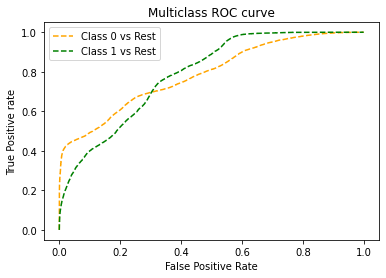

In [245]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr = {}
tpr = {}
thresholds = {}
auc_score = {}
for i in range(2):
  fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, pred_prob[:, i], pos_label=i)
  auc_score[i] = roc_auc_score(y_test, pred_prob[:, i], multi_class='ovr')

print(auc_score[0], auc_score[1])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

**Accuracy of Model**

In [246]:
# Berikan jawaban 1 di sini
score_train = logistic_regression.score(x_train, y_train)
print(score_train)

score_test = logistic_regression.score(x_test, y_test)
print(score_test)

0.6785751093181784
0.6782150157165187


2. [10] Implementasikan Softmax Regression dengan target yang digunakan adalah kolom TARGET_softmax. Gunakan method dari library sklearn.
>- Visualisasikan Visualisasikan ROC dan AUC.
>- Tampilkan rata-rata akurasi yang didapat.

**Preparation**

In [248]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
y_target = df['TARGET_softmax']
x_train, x_test, y_train, y_test = train_test_split(
    df_pca_component, y_target, test_size = .3, random_state = 30)

**Softmax Regression**

In [249]:
# Training the model
from sklearn.linear_model import LogisticRegression
softmax_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_regression.fit(x_train, y_train)

# Predicting
y_prediction_logistic = softmax_regression.predict(x_test)
print(x_test.shape)
print(y_prediction_logistic.shape)

# Predict Probability
pred_prob = softmax_regression.predict_proba(x_test)

(58219, 1)
(58219,)


**ROC and AUC**

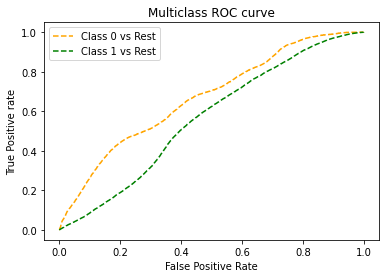

In [250]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr = {}
tpr = {}
thresholds = {}
auc_score = {}
for i in range(2):
  fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, pred_prob[:, i], pos_label=i)
#   auc_score[i] = roc_auc_score(y_test, pred_prob[:, i], multi_class='ovr')

# print(auc_score[0], auc_score[1])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

**Accuracy of Model**

In [251]:
# Barikan jawaban 2 di sini
score_train = softmax_regression.score(x_train, y_train)
print(score_train)

score_test = softmax_regression.score(x_test, y_test)
print(score_test)

0.6899927857363702
0.6907023480307116


3. [10] Bandingkan performa kedua model pada train and test. Model yang mana yang lebih bagus? Jelaskan kira-kira mengapa

> Accuracy of Model pada Logistic Regression

*   Train: 67.8% ~ 68%
*   Test: 67.8% ~ 68%

> Accuracy of Model pada Softmax Regression


*   Train: 68.9% ~ 69%
*   Test: 69%

Berdasarkan perbandingan statistik yang sudah saya lampirkan, model pada softmax regression jauh lebih baik dengan akurasi sebesar 69%, lebih tinggi 2% ketimbang model pada logistic regression dengan akurasi sebesar 68%.

Selain itu grafik kurva ROC pada softmax regression lebih rapih, tanpa overlap ketimbang kurva ROC pada logistic regression. Hal ini disebabkan karena softmax menggunakan parameter 'multinomial' yang mana dengan menggunakan multinomial besaran loss paling minimum merupakan besaran yang digunakan dan cocok untuk seluruh komponen pada dataset.

Hal ini lah yang menyebabkan akurasi pada softmax lebih tinggi ketimbang pada logistic regression karena besaran error dan lossnya minimum untuk keseluruhan model.